In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
'''
con = sqlite3.connect("../Data/Pilot.db")
subjects = pd.read_sql_query('SELECT * from subjects', con)
trial_dat = pd.read_sql_query('SELECT * from trials', con)
## Have to recode the stimulus and agent columns. Fix this after pilot
trial_dat['stimulus'] = trial_dat['stimulus'].str.split('/', expand=True)[2]
trial_dat['agent'] = ['a_' in stim for stim in trial_dat.stimulus]
trial_dat.agent.replace([True, False], ['animate', 'inanimate'], inplace=True)
trial_dat.sort_values('jspsychID', inplace=True)
trial_dat.rename(columns={'cause_resp': 'causal_rating', 'cf_resp':'counterfactual_rating', 'agent_resp':'animacy_rating'}, inplace=True)
trial_dat.reset_index(drop=True, inplace=True)
trial_dat['outcome'] = trial_dat['stimulus'].str.split('_', expand=True)[1]
trial_dat['cf'] = trial_dat['stimulus'].str.split('_', expand=True)[2].str.split('.mp4', expand=True)[0]
trial_dat['outcome_CF_match'] =  trial_dat.outcome ==  trial_dat.cf
# Remove non-pilot or incomplete data.
prolific_dat = pd.read_csv('../Data/prolific_export_61157bbe3fcc793fbb6432e6.csv')
prolificIds = prolific_dat.loc[prolific_dat.status == "APPROVED"].participant_id
subjectIDs = subjects[subjects.prolificID.isin(prolificIds.values)].id
trial_dat = trial_dat[trial_dat.subject_id.isin(subjectIDs.values)]
trial_dat.sort_values(['subject_id', 'trial_num'], inplace=True)
trial_dat.drop('id',axis=1, inplace=True)
traj = trial_dat['stimulus'].str.split('_', expand=True)[0]

trial_dat['vid_num'] = [int(re.split('a|p', t)[0]) for t in traj]
trial_dat.to_csv('../Data/pilot_data_8_16-21.csv', sep=',', header=True)
'''

'\ncon = sqlite3.connect("../Data/Pilot.db")\nsubjects = pd.read_sql_query(\'SELECT * from subjects\', con)\ntrial_dat = pd.read_sql_query(\'SELECT * from trials\', con)\n## Have to recode the stimulus and agent columns. Fix this after pilot\ntrial_dat[\'stimulus\'] = trial_dat[\'stimulus\'].str.split(\'/\', expand=True)[2]\ntrial_dat[\'agent\'] = [\'a_\' in stim for stim in trial_dat.stimulus]\ntrial_dat.agent.replace([True, False], [\'animate\', \'inanimate\'], inplace=True)\ntrial_dat.sort_values(\'jspsychID\', inplace=True)\ntrial_dat.rename(columns={\'cause_resp\': \'causal_rating\', \'cf_resp\':\'counterfactual_rating\', \'agent_resp\':\'animacy_rating\'}, inplace=True)\ntrial_dat.reset_index(drop=True, inplace=True)\ntrial_dat[\'outcome\'] = trial_dat[\'stimulus\'].str.split(\'_\', expand=True)[1]\ntrial_dat[\'cf\'] = trial_dat[\'stimulus\'].str.split(\'_\', expand=True)[2].str.split(\'.mp4\', expand=True)[0]\ntrial_dat[\'outcome_CF_match\'] =  trial_dat.outcome ==  trial_dat.cf

In [17]:
class PilotDat():
    def __init__(self, dataPath='../Data/pilot_data_8_16-21.csv' ):
        self.dat = pd.read_csv(dataPath)

    def show_variables(self):
        print(self.dat.columns.tolist())

    def rating_dist(self, variable, hue=None, filename=None):
        f, a = plt.subplots(figsize=(8, 6))
        sns.kdeplot(data=self.dat, x=variable, hue=hue, ax=a)
        sns.rugplot(data=self.dat, x=variable, hue=hue, ax=a)
        if filename is not None:
            plt.savefig('../Plots/'+filename)



pilotDat = PilotDat()

In [18]:
pilotDat.show_variables()

['trial_num', 'jspsychID', 'stimulus', 'agent', 'time_elapse', 'causal_rating', 'counterfactual_rating', 'animacy_rating', 'rt_1', 'rt_2', 'rt_3', 'trial_rt', 'subject_id', 'outcome', 'cf', 'outcome_CF_match', 'vid_num']


### animacy manipulation check

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


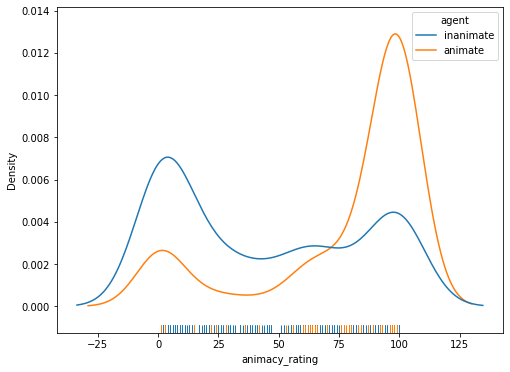

In [19]:
pilotDat.rating_dist(variable='animacy_rating', hue='agent', filename='AnimacyRatings.png')

In [56]:
pilotDat.dat.groupby(['vid_num', 'agent']).mean().animacy_rating.diff(-1).xs('animate', level=1).sort_values()

vid_num
2     22.526316
10    23.240909
1     23.473810
14    26.275120
24    27.666667
8     30.114286
15    30.300000
3     31.634211
12    32.178571
6     32.977273
13    33.702632
11    33.785714
21    34.621053
19    36.892105
4     37.992481
9     38.030075
20    39.028571
18    40.868421
16    41.446115
23    43.097368
5     43.200000
7     44.298701
22    44.766667
17    48.189474
Name: animacy_rating, dtype: float64

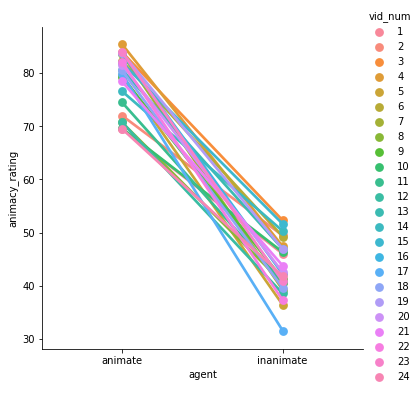

In [48]:
anim = pilotDat.dat.groupby(['vid_num', 'agent']).mean().animacy_rating.reset_index()
sns.catplot(data=anim, x='agent', y='animacy_rating', hue='vid_num', kind='point')

In [ ]:
#fig, ax = plt.subplots()
#g = sns.catplot(data=trial_dat, x='agent', y='causal_rating', col='outcome_CF_match', kind='box')
#g = sns.catplot(data=trial_dat, x='agent', y='causal_rating', col='outcome_CF_match', kind='swarm')
g = sns.boxplot(data=trial_dat, x='agent', y='causal_rating')
g = sns.swarmplot(data=trial_dat, x='agent', y='causal_rating', color='.2')
plt.savefig('causalRateXagent.png')
#trial_dat.melt(id_vars=['agent', 'stim_outcome', 'stim_cf'], value_vars=['cause_resp', 'cf_resp', 'agent_resp'])
#sns.catplot(data=trial_dat, x)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 43.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

Text(0.5, 1.0, 'outcome_cf_match=False')

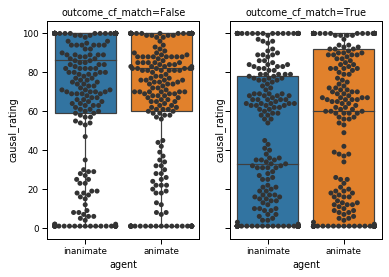

In [5]:
sns.set_context(context='paper')
f, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
gg = sns.boxplot(data=trial_dat.loc[trial_dat.outcome_CF_match == False], x='agent', y='causal_rating', ax=ax[0])
gg = sns.swarmplot(data=trial_dat.loc[trial_dat.outcome_CF_match == False], x='agent', y='causal_rating', color=".2", ax=ax[0])
g = sns.boxplot(data=trial_dat.loc[trial_dat.outcome_CF_match == True], x='agent', y='causal_rating', ax=ax[1])
g = sns.swarmplot(data=trial_dat.loc[trial_dat.outcome_CF_match == True], x='agent', y='causal_rating', color=".2", ax=ax[1])
g.set_title('outcome_cf_match=True')
gg.set_title('outcome_cf_match=False')
#g = sns.catplot(data=trial_dat, x='agent', y='causal_rating', col='outcome_CF_match', kind='swarm')
#plt.savefig('causalRateXagentXstim.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

Text(0.5, 1.0, 'outcome_cf_match=False')

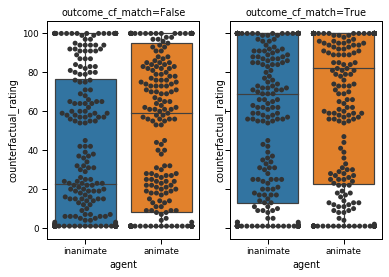

In [6]:
sns.set_context(context='paper')
f, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
gg = sns.boxplot(data=trial_dat.loc[trial_dat.outcome_CF_match == False], x='agent', y='counterfactual_rating', ax=ax[0])
gg = sns.swarmplot(data=trial_dat.loc[trial_dat.outcome_CF_match == False], x='agent', y='counterfactual_rating', color=".2", ax=ax[0])
g = sns.boxplot(data=trial_dat.loc[trial_dat.outcome_CF_match == True], x='agent', y='counterfactual_rating', ax=ax[1])
g = sns.swarmplot(data=trial_dat.loc[trial_dat.outcome_CF_match == True], x='agent', y='counterfactual_rating', color=".2", ax=ax[1])
g.set_title('outcome_cf_match=True')
gg.set_title('outcome_cf_match=False')
#plt.savefig('causalRateXagentXstim.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


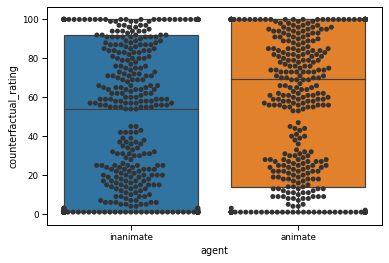

In [7]:
g = sns.boxplot(data=trial_dat, x='agent', y='counterfactual_rating')
g = sns.swarmplot(data=trial_dat, x='agent', y='counterfactual_rating', color='.2')
plt.savefig('cf_rating.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot

Text(0.5, 1.0, 'Counterfactual In')

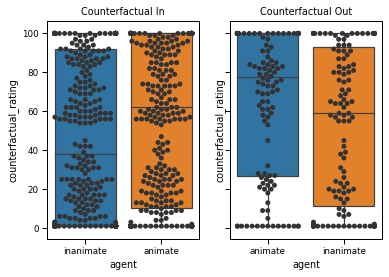

In [8]:

f, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
gg = sns.boxplot(data=trial_dat.loc[trial_dat.stim_cf == 0], x='agent', y='counterfactual_rating', ax=ax[0])
gg = sns.swarmplot(data=trial_dat.loc[trial_dat.stim_cf == 0], x='agent', y='counterfactual_rating', color=".2", ax=ax[0])
g = sns.boxplot(data=trial_dat.loc[trial_dat.stim_cf == 1], x='agent', y='counterfactual_rating', ax=ax[1])
g = sns.swarmplot(data=trial_dat.loc[trial_dat.stim_cf == 1], x='agent', y='counterfactual_rating', color=".2", ax=ax[1])
g.set_title('Counterfactual Out')
gg.set_title('Counterfactual In')

In [84]:
trial_dat.melt(value_vars=['stim_outcome', 'stim_cf'], var_name='stimulus condition')

,stimulus condition,value
0,stim_outcome,0
1,stim_outcome,0
2,stim_outcome,1
3,stim_outcome,1
4,stim_outcome,1
...,...,...
2357,stim_cf,0
2358,stim_cf,0
2359,stim_cf,1
2360,stim_cf,1


In [9]:
trial_dat['stim_condition']= 0
for i in range(len(trial_dat)):
    if (trial_dat.iloc[i].outcome == 'out') & (trial_dat.iloc[i].cf == 'out'):
        trial_dat.loc[i, 'stim_condition'] = 0
    if (trial_dat.iloc[i].outcome == 'out') & (trial_dat.iloc[i].cf == 'in'):
        trial_dat.loc[i, 'stim_condition'] = 1
    if (trial_dat.iloc[i].outcome == 'in') & (trial_dat.iloc[i].cf == 'out'):
        trial_dat.loc[i, 'stim_condition'] = 2
    if (trial_dat.iloc[i].outcome == 'in') & (trial_dat.iloc[i].cf == 'in'):
        trial_dat.loc[i, 'stim_condition'] = 3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

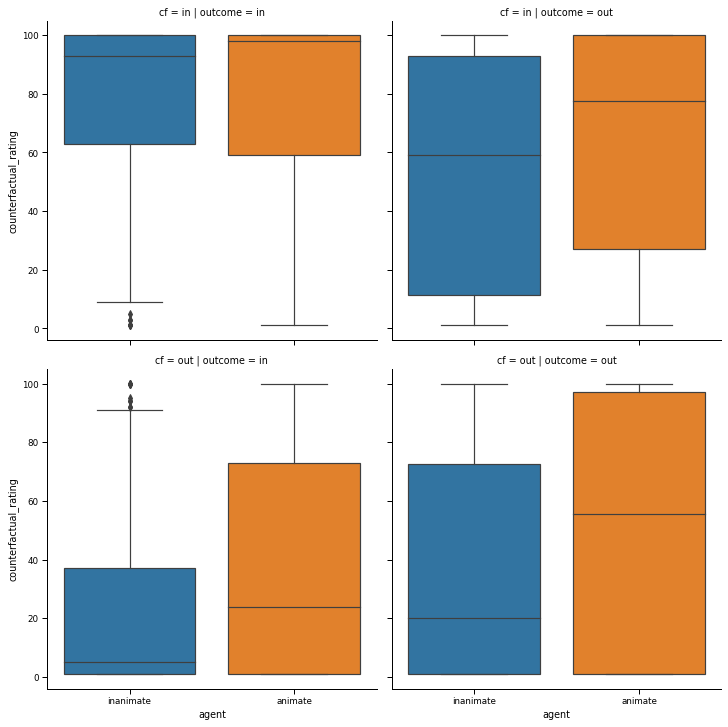

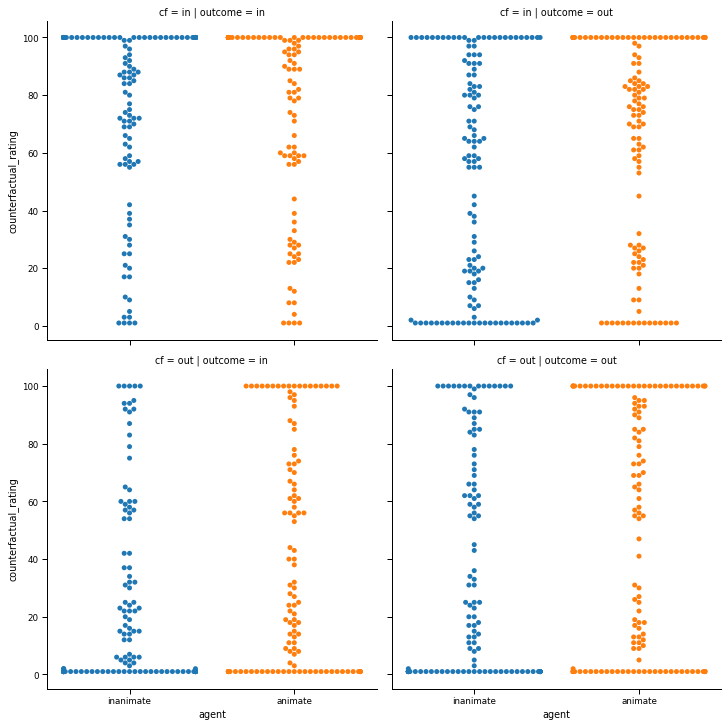

In [10]:
sns.catplot(data=trial_dat, x='agent', y='counterfactual_rating', col='outcome', row='cf', kind='box')
sns.catplot(data=trial_dat, x='agent', y='counterfactual_rating', col='outcome', row='cf', kind='swarm')

<Figure size 576x576 with 0 Axes>

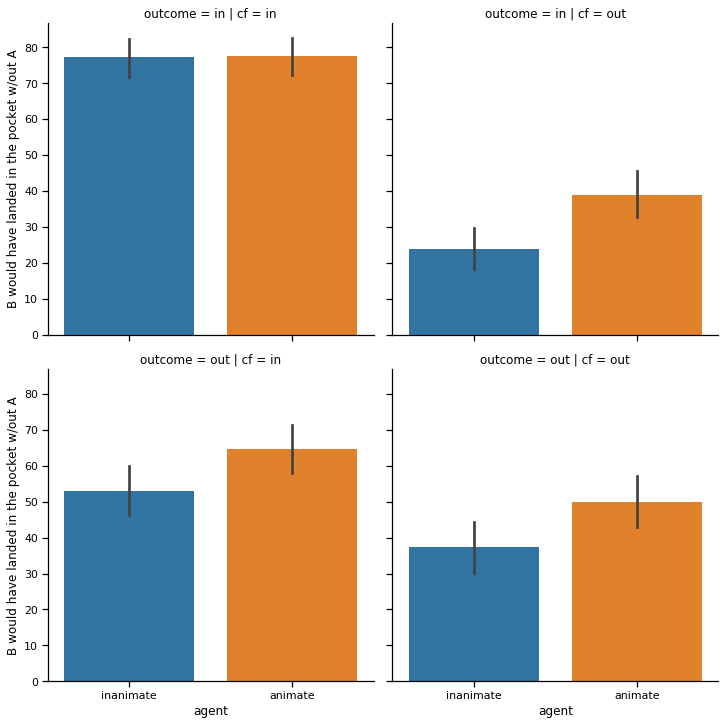

In [11]:
plt.figure(figsize=(8, 8))
sns.set_context(context='notebook')

g = sns.catplot(x="agent", y="counterfactual_rating", row="outcome", col="cf",
                data=trial_dat, kind="bar",
                );
#g.map_dataframe(sns.swarmplot, x="agent", y="counterfactual_rating",
#                 palette=["#404040"],
#                )

g.axes[0][0].set_ylabel('B would have landed in the pocket w/out A')
g.axes[1][0].set_ylabel('B would have landed in the pocket w/out A')

g.savefig('cf_x_stim_average.png')
#plt.savefig('cf_x_stimcondition.png', )

Text(12.334999999999994, 0.5, 'A caused outcome')

<Figure size 576x576 with 0 Axes>

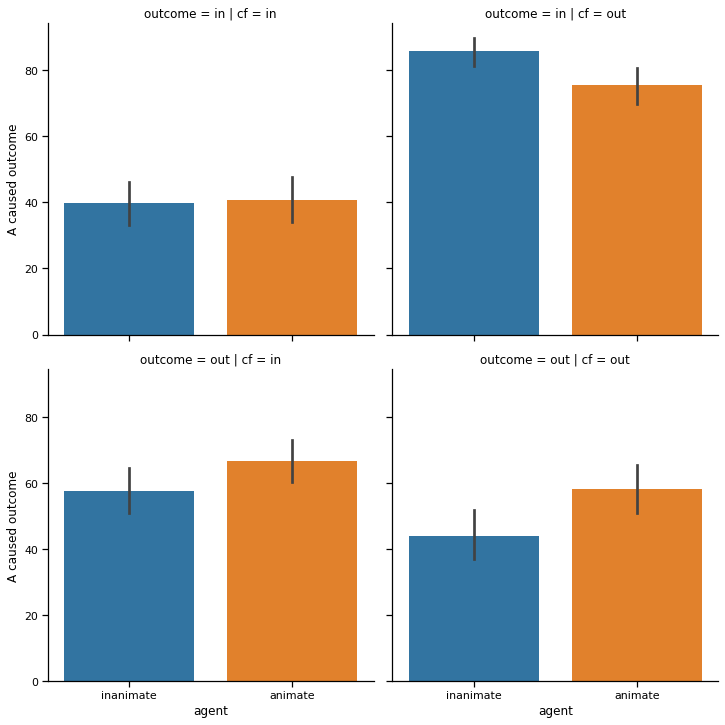

In [12]:

plt.figure(figsize=(8, 8))
sns.set_context(context='notebook')

g = sns.catplot(x="agent", y="causal_rating", row="outcome", col="cf",
                data=trial_dat, kind="bar",
                );
#g.map_dataframe(sns.swarmplot, x="agent", y="causal_rating",
#                 palette=["#404040"],)

g.axes[0][0].set_ylabel('A caused outcome')
g.axes[1][0].set_ylabel('A caused outcome')

#g.savefig('cause_x_stim_average.png')

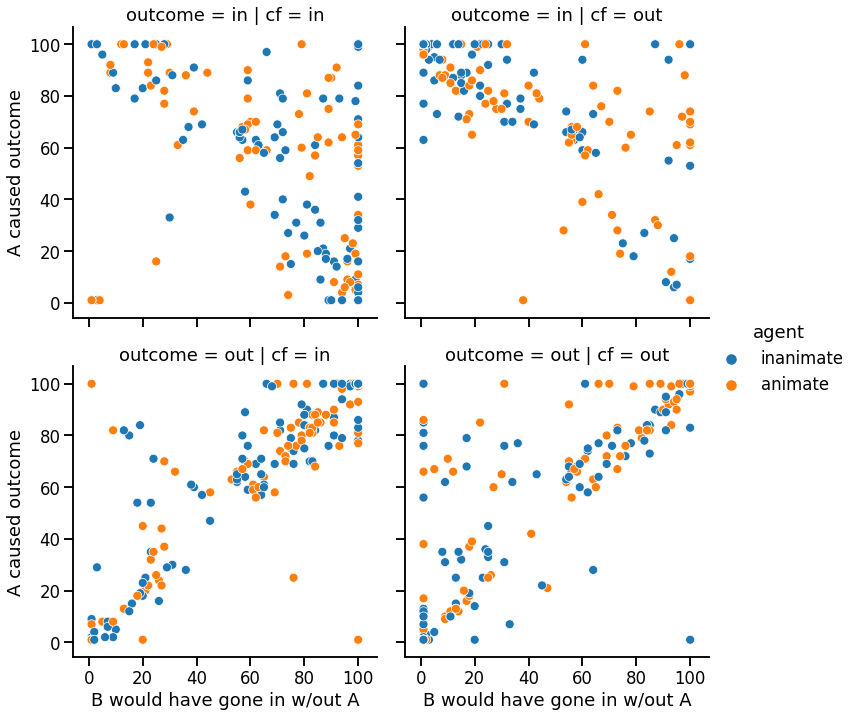

In [13]:
sns.set_context("talk")
g = sns.relplot(x='counterfactual_rating', y='causal_rating', hue='agent', row='outcome', col='cf', data=trial_dat)
g.axes[0][0].set_ylabel('A caused outcome')
g.axes[1][0].set_ylabel('A caused outcome')
g.axes[1][0].set_xlabel('B would have gone in w/out A')
g.axes[1][1].set_xlabel('B would have gone in w/out A')

g.savefig('cause_cf_agent.png')

In [20]:
plt.figure(figsize=(8, 8))
sns.set_context(context='notebook')

g = sns.catplot(x="counterfactual", y="causal_rating", row="outcome", col="cf",
                data=trial_dat, kind="s",
                );
g.map_dataframe(sns.swarmplot, x="agent", y="causal_rating",
                 palette=["#404040"],
                )

g.axes[0][0].set_ylabel('A caused outcome')
g.axes[1][0].set_ylabel('A caused outcome')

#g.savefig('cause_x_stim.png')


ValueError: Plot kind 's' is not recognized

<Figure size 576x576 with 0 Axes>

In [72]:
#g.savefig('cause_cf_agent_stimAverage.png')

ValueError: Could not interpret value `agent` for parameter `hue`

In [15]:

dd = trial_dat.groupby('stimulus').mean()
dd['agent'] = ['animate' if 'a_' in stim else 'inanimate'  for stim in dd.index ]
dd.reset_index(inplace=True)
dd['outcome'] = dd['stimulus'].str.split('_', expand=True)[1]
dd['cf'] = dd['stimulus'].str.split('_', expand=True)[2].str.split('.mp4', expand=True)[0]

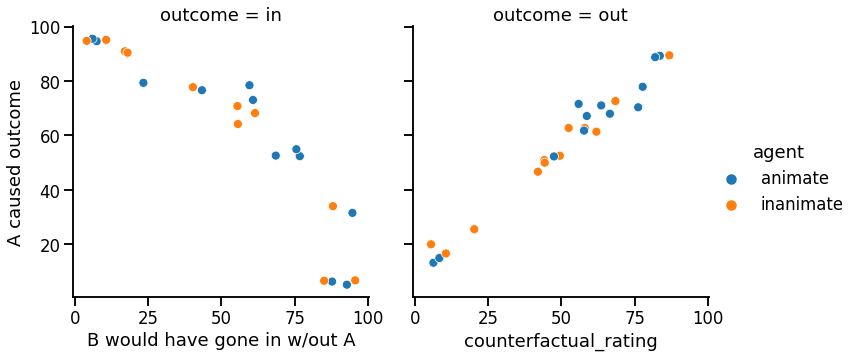

In [19]:
sns.set_context("talk")
g = sns.relplot(x='counterfactual_rating', y='causal_rating',col='outcome', hue='agent', data=dd)
g.axes[0][0].set_ylabel('A caused outcome')
#g.axes[1][0].set_ylabel('A caused outcome')
g.axes[0][0].set_xlabel('B would have gone in w/out A')
#g.axes[1][1].set_xlabel('B would have gone in w/out A')
g.savefig('avgCause_x_avgCF_x_stimCondition.png')

In [22]:
trajdd = dd['stimulus'].str.split('_', expand=True)[0]
dd['vid_num'] = [re.split('a|p', t)[0] for t in trajdd]

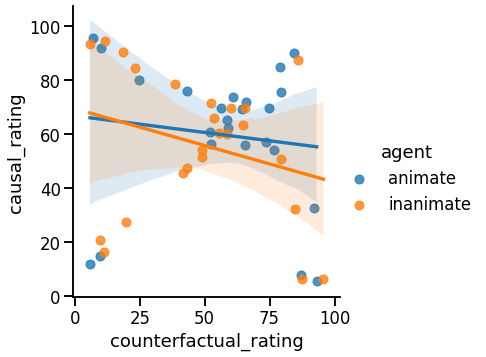

In [109]:
g = sns.lmplot(x='counterfactual_rating', y='causal_rating', hue='agent', data=dd)

In [21]:


traj = trial_dat['stimulus'].str.split('_', expand=True)[0]
trial_dat['vid_num'] = [int(re.split('a|p', t)[0]) for t in traj]
#trial_dat['traj']

TypeError: expected string or bytes-like object

In [102]:
sns.pointplot(x='vid_num', )

,id,trial_num,jspsychID,stimulus,agent,time_elapse,stim_outcome,stim_cf,causal_rating,counterfactual_rating,...,rt_1,rt_2,rt_3,trial_rt,subject_id,outcome,cf,outcome_CF_match,stim_condition,vid_num
320,456,78,78oupzdys7m4gth,1p_in_out_close.mp4,inanimate,1297976.0,1,0,100,100,...,9095.20,13652.40,18972.300,19615.900,7,in,out,False,2,1
133,910,76,5eaj55aumxab44r,1a_in_out_close.mp4,animate,941496.0,1,0,1,100,...,5341.82,11462.40,14521.595,15862.310,27,in,out,False,2,1
399,1172,90,ay5lkvdl6allkz7,1a_in_out_close.mp4,animate,1308886.0,1,0,1,100,...,9270.73,12089.07,14800.030,16322.265,33,in,out,False,2,1
637,490,54,gg5vfbquklauwz5,1p_in_out_close.mp4,inanimate,787151.0,1,0,53,100,...,6085.50,7711.60,22170.000,22773.800,18,in,out,False,2,1
246,1045,40,6e1tucoyvn6zm90,1p_in_out_close.mp4,inanimate,1039187.0,1,0,94,7,...,16250.80,19703.50,38785.300,39885.300,31,in,out,False,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,904,50,hga43ch737yu1o0,9a_in_in.mp4,animate,3136363.0,1,0,69,59,...,3425.00,4283.00,5156.000,7200.000,22,in,in,True,3,9
45,473,38,15a994d8otom797,9p_in_in.mp4,inanimate,1232600.0,1,0,56,71,...,10291.60,12859.20,15618.900,20810.900,17,in,in,True,3,9
562,399,94,cdfvj15z6yfnera,9p_in_in.mp4,inanimate,941813.0,1,0,86,59,...,6134.80,7856.60,9231.800,9852.800,8,in,in,True,3,9
869,1180,18,mf722m408lwexzw,9p_in_in.mp4,inanimate,1012132.0,1,0,100,100,...,105395.20,122203.00,129252.300,132684.000,34,in,in,True,3,9


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


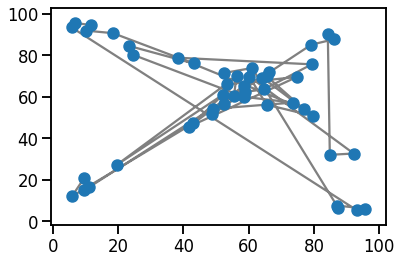

In [110]:

plt.plot(dd.counterfactual_rating,
         dd.causal_rating,
         color='gray',
         zorder=-1)
plt.scatter(dd.counterfactual_rating,
            dd.causal_rating,
            s=120)

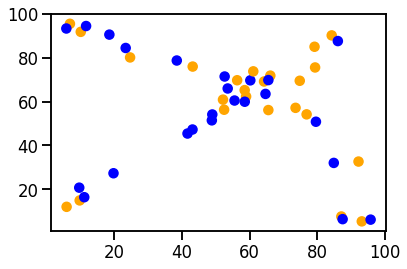

In [111]:
colors = {'animate':'orange', 'inanimate':'blue'}
plt.scatter(dd.counterfactual_rating,
            dd.causal_rating,
            c=dd.agent.map(colors))

No handles with labels found to put in legend.


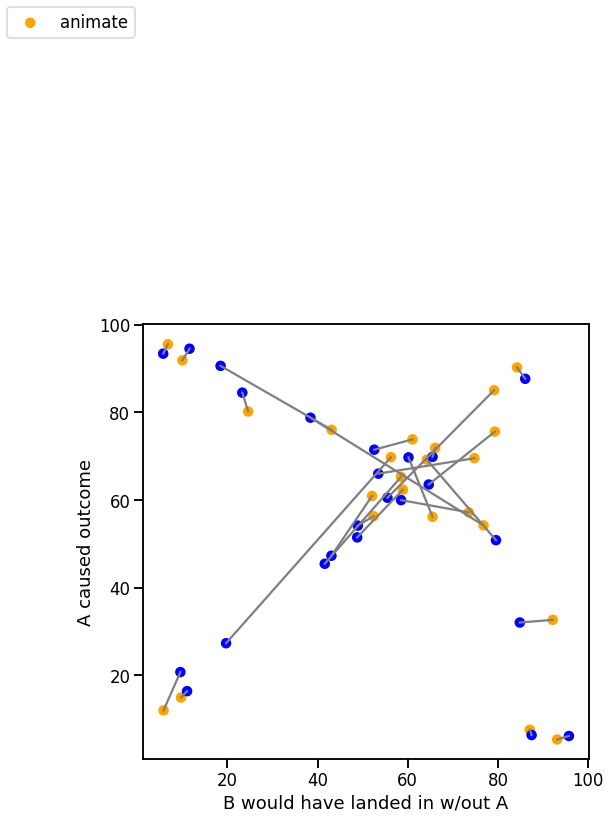

In [155]:
import numpy as np
#X_coords= np.array([dd.query("agent=='animate'").counterfactual_ratings,
 #                   dd.query("agent=='inanimate'").counterfactual_rating])

X_coords = np.array([dd.query("agent=='animate'").counterfactual_rating,
 dd.query("agent=='inanimate'").counterfactual_rating])
Y_coords = np.array([dd.query("agent=='animate'").causal_rating,
 dd.query("agent=='inanimate'").causal_rating])
colors = {'animate':'orange', 'inanimate':'blue'}

plt.figure(figsize=(8,8))
plt.scatter(dd.counterfactual_rating,
            dd.causal_rating,
            c=dd.agent.map(colors))
plt.legend(colors, loc='best', bbox_to_anchor=(0, .75, 0, 1))

plt.plot(X_coords,
         Y_coords,
         color='gray')

g.axes.legend()
plt.ylabel('A caused outcome')
plt.xlabel('B would have landed in w/out A')
plt.savefig('cause_x_cf_x_traj.png')

AttributeError: 'AxesSubplot' object has no attribute 'Axes'

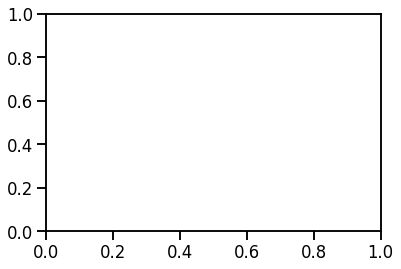

In [138]:
plt.axes().Axes()

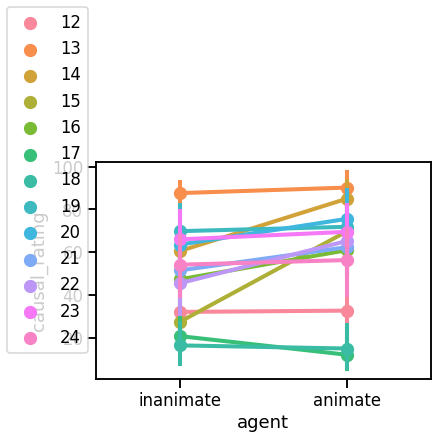

In [168]:
sns.color_palette("Set2")
sns.pointplot(x='agent', y='causal_rating', hue='vid_num', data=trial_dat.loc[trial_dat.vid_num >= 12], legend=False)
plt.legend(bbox_to_anchor=(0, .75, 0, 1))

In [164]:
trial_dat.vid_num[0]

'21'